In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

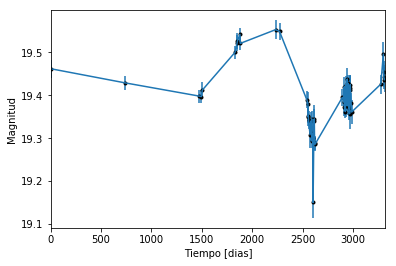

In [2]:
data = np.genfromtxt('LC_18822_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

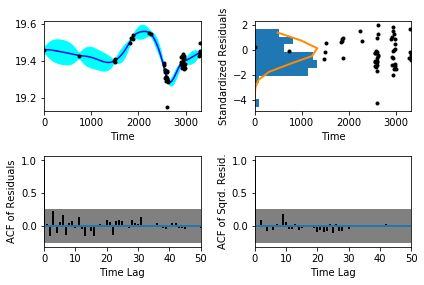

In [5]:
sample.assess_fit()

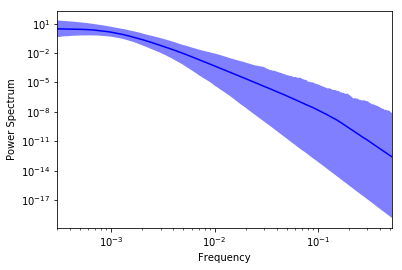

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0411911,'Medida del nivel de ruido')

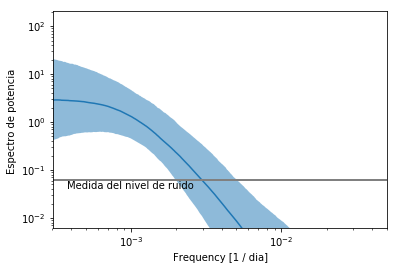

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

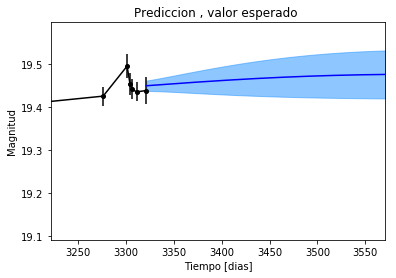

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

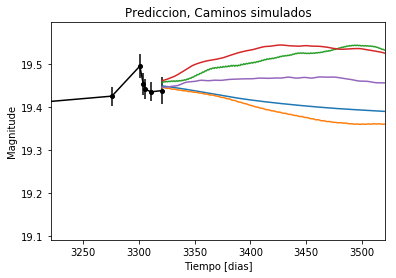

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


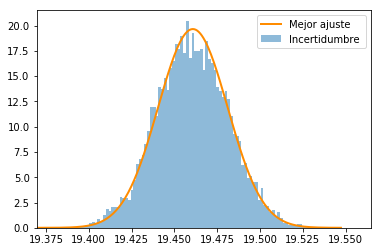

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

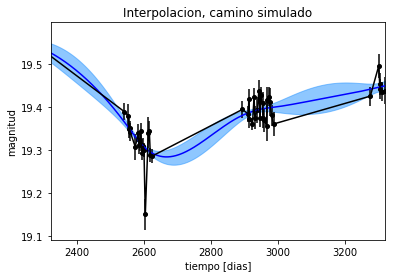

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

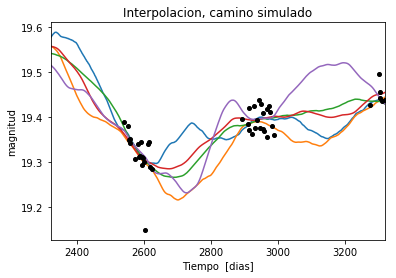

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 610.368674983
Median: 0.00318049341428
Standard deviation: 0.182162904446
68% credibility interval: [ 0.00048749  0.11310084]
95% credibility interval: [  3.24907838e-04   7.71741024e-01]
99% credibility interval: [  3.05389781e-04   9.74099620e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 374.877953857
Median: 0.00104417231288
Standard deviation: 0.0679034913699
68% credibility interval: [ 0.00040328  0.0091037 ]
95% credibility interval: [ 0.00031187  0.16445025]
99% credibility interval: [  3.02320027e-04   4.64910379e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 220.153631099
Median: 0.00831931217278
Standar

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 331.435272715
Median: 0.000914631724836
Standard deviation: 0.228943289956
68% credibility interval: [ 0.          0.23777979]
95% credibility interval: [ 0.        0.891365]
99% credibility interval: [ 0.         0.9953522]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 331.435272715
Median: 0.000914631724836
Standard deviation: 0.228943289956
68% credibility interval: [ 0.          0.23777979]
95% credibility interval: [ 0.        0.891365]
99% credibility interval: [ 0.         0.9953522]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 414.406233634
Median: 0.0
Standard deviation: 0.000454907694821
68% credibilit

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1049.13037741
Median: 136.651115604
Standard deviation: 1.7155804529
68% credibility interval: [ 134.6759555   137.93677486]
95% credibility interval: [ 132.21670667  138.9012295 ]
99% credibility interval: [ 130.44661541  139.47519739]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 422.111664106
Median: 0.368784782887
Standard deviation: 2.09650243193
68% credibility interval: [ 0.03487747  3.49738022]
95% credibility interval: [ 0.01220044  6.80177536]
99% credibility interval: [  9.80335456e-03   1.03561249e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 530.514251005
Median: 0.106347939442
Standard deviation: 8.27773746272
68% credibility interval: [  3.47996658e-03   5.19941217e+00]
95% credibility interv

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0356287
Median: 2.23619025782e-13
Standard deviation: 9.98799383353e+103
68% credibility interval: [  5.86839099e-55   9.07657166e+35]
95% credibility interval: [  3.50654967e-89   7.39167947e+54]
99% credibility interval: [  1.98244675e-106   1.01785995e+077]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2954.117992
Median: 19.43974793
Standard deviation: 0.0399619886703
68% credibility interval: [ 19.40985755  19.47225012]
95% credibility interval: [ 19.35912701  19.52247975]
99% credibility interval: [ 19.30655923  19.57520674]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 331.435272715
Median: 0.000914631724836
Standard deviation: 0.228943289956
68% credibility interval: [ 0.          0.23777979]
95% credibility interval: [ 0.        0.891365]
99% credibility interval: [ 0.         0.9953522]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 331.435272715
Median: 0.000914631724836
Standard deviation: 0.228943289956
68% credibility interval: [ 0.          0.23777979]
95% credibility interval: [ 0.        0.891365]
99% credibility interval: [ 0.         0.9953522]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 414.406233634
Median: 0.0
Standard deviation: 0.000454907694821
68% credibilit

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1049.13037741
Median: 136.651115604
Standard deviation: 1.7155804529
68% credibility interval: [ 134.6759555   137.93677486]
95% credibility interval: [ 132.21670667  138.9012295 ]
99% credibility interval: [ 130.44661541  139.47519739]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1526.4311104
Median: 0.00706135244142
Standard deviation: 0.0095291744494
68% credibility interval: [ 0.00397174  0.0135373 ]
95% credibility interval: [ 0.00247315  0.03137019]
99% credibility interval: [ 0.00199164  0.06200955]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1495.23319354
Median: 1.18972674832
Standard deviation: 0.174694618862
68% credibility interval: [ 1.03099697  1.3721398 ]
95% credibility interval: [ 0.90761647  1.59352936]
99% credibility interval: [ 0.83354728  1.75482922]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2709.77545548
Median: 6.55640977907e-06
Standard deviation: 0.0114631522357
68% credibility interval: [  3.38005863e-40   5.55207576e-04]
95% credibility interval: [  2.31299272e-60   4.84773457e-03]
99% credibility interval: [  4.96543883e-83   3.13813976e-02]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 610.368674983
Median: (-0.0199836294902-1.16215987085j)
Standard deviation: 1.83828386178
68% credibility interval: [-0.71063355+0.j -0.00306300+0.j]
95% credibility interval: [ -4.84899186e+00-0.04962082j  -2.04145616e-03-0.00095041j]
99% credibility interval: [ -6.12044842e+00+0.j          -1.91882058e-03-5.00860476j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 374.877953857
Median: (-0.00656072813446+0.0102015216989j)
Standard deviation: 1.50043088922
68% credibility interval: [-0.05720023 +3.88698347e+00j -0.00253387 +3.75780993e-03j]
95% credibility interval: [-1.03327141 +5.18782500e+00j -0.00195956 +2.32117275e-03j]
99% credibility interval: [ -2.92111806e+00+5.56801977j  -1.89953275e-03+0.j        ]
Posteri